# Assignment - 1
Submitted by : LUTHRA Abhishek (86828)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation and a first Analysis

In [2]:
hotels = pd.read_csv('hotels.csv')
hotels.head()

,price,distance,stars,rating
0,81,1.7,four,3.9
1,85,1.4,four,3.7
2,83,1.7,three,4.0
3,82,1.2,four,3.9
4,103,0.9,four,3.9


In [3]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialise the MinMaxScaler 
scaler = MinMaxScaler()

# To scale data 
scaler.fit(hotels['rating'].values.reshape(-1,1)) 
hotels['rating_scale']=scaler.transform(hotels['rating'].values.reshape(-1,1))
hotels.head()

,price,distance,stars,rating,rating_scale
0,81,1.7,four,3.9,0.743590
1,85,1.4,four,3.7,0.692308
2,83,1.7,three,4.0,0.769231
3,82,1.2,four,3.9,0.743590
4,103,0.9,four,3.9,0.743590


In [4]:
rating_scale_med = np.median(hotels['rating_scale'])

print(f'The Median of Rating Scale is : {rating_scale_med:.3f}')

The Median of Rating Scale is : 0.795


In [5]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         235 non-null    int64  
 1   distance      235 non-null    float64
 2   stars         235 non-null    object 
 3   rating        235 non-null    float64
 4   rating_scale  235 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.3+ KB


In [6]:
# Dropping the outliers for price variable using outlier detection rule

m=hotels['price'].mean()
s=hotels['price'].std()
upper_limit= m + 3 * s
lower_limit = m - 3 * s

hotels_new = hotels[(hotels['price'] < upper_limit) & (hotels['price'] > lower_limit)]

hotel_price_count = hotels['price'].count()
hotel_new_price_count = hotels_new['price'].count()

percentage_outliers = ((hotel_price_count-hotel_new_price_count)/hotel_price_count)*100

print(f' The percentage of outliers detected is: {percentage_outliers:.2f}%')

 The percentage of outliers detected is: 2.98%


#### We are removing the detected outliers from the original data frame hotels by making a new dataframe-  hotels_new

In [7]:
print(hotels.info())
print(hotels_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         235 non-null    int64  
 1   distance      235 non-null    float64
 2   stars         235 non-null    object 
 3   rating        235 non-null    float64
 4   rating_scale  235 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 234
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         228 non-null    int64  
 1   distance      228 non-null    float64
 2   stars         228 non-null    object 
 3   rating        228 non-null    float64
 4   rating_scale  228 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.7+ KB
None


Make a scatter plot of the price versus the scaled rating.

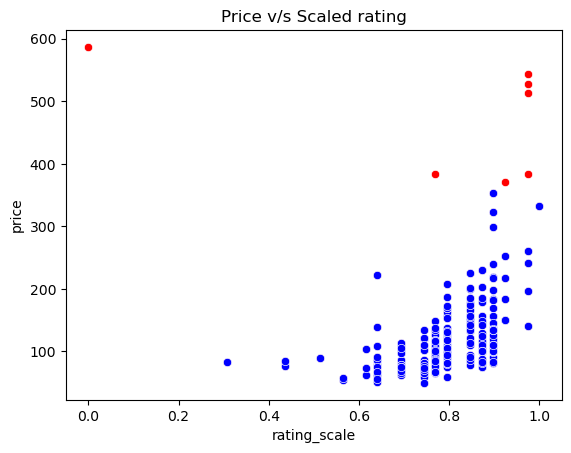

In [8]:
sns.scatterplot(data = hotels, x = 'rating_scale', y = 'price', color = 'r').set(title='Price v/s Scaled rating')
sns.scatterplot(data = hotels_new, x = 'rating_scale', y = 'price', color = 'b').set(title='Price v/s Scaled rating')
plt.show()
#red dots here represents price outliers 

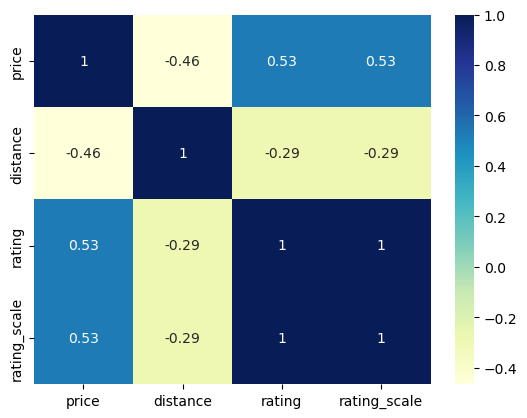

In [9]:
# Find correlation 
cor_matrix=hotels_new.corr()

sns.heatmap(cor_matrix, annot = True, cmap="YlGnBu")
plt.show()

Here, the relationship between price and ratings is both postive and moderate correlated (+0.53). 
This can be explained by means that more price spent is associated with hotels having higher and better ratings. For instance, hotels having 5 stars are expensive than three stars hotels.

On the other hand, relationship between price and distance is between weak to moderate and negatively correlated (-0.46). This could mean that more price spent is associated with less distance as hotels near to the city centre are generally expensive than those farther away. Also, the relationship between distance and ratings is weak and negatively correlated (-0.29).

### Discuss briefly :

In [10]:
#We will create a list of the conditions and corresponding values that we want to assign for each condition, that is, for three stars hotel we use 0 and for four/ five stars we use 1

conditions =[
    (hotels_new['stars'] == 'three'),
    (hotels_new['stars'] == 'four') | (hotels_new['stars'] == 'five')
    ]

values = [0, 1]

In [11]:
hotels_new['stars_high'] = np.select(conditions, values)

hotels_new.head()

/var/folders/cd/s6nmmb59021f5gz_cvdrl87w0000gn/T/ipykernel_66703/2036442161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_new['stars_high'] = np.select(conditions, values)


,price,distance,stars,rating,rating_scale,stars_high
0,81,1.7,four,3.9,0.743590,1
1,85,1.4,four,3.7,0.692308,1
2,83,1.7,three,4.0,0.769231,0
3,82,1.2,four,3.9,0.743590,1
4,103,0.9,four,3.9,0.743590,1


In [12]:
hotels_price = hotels_new[['price', 'stars']]
hotels_price.head()

price3 =  hotels_price.loc[hotels_price['stars']=='three']
price4 =  hotels_price.loc[hotels_price['stars']=='four']
price5 =  hotels_price.loc[hotels_price['stars']=='five']


print('Average price of the Hotel: ' + str(round(np.mean(hotels_new['price']),2)))
print('Average price for a 3 star Hotel: ' + str(round(np.mean(price3),2)))
print('Average price for a 4 star Hotel: ' + str(round(np.mean(price4),2)))
print('Average price for a 5 star Hotel: ' + str(round(np.mean(price5),2)))

Average price of the Hotel: 118.22
Average price for a 3 star Hotel: price    88.3
dtype: float64
Average price for a 4 star Hotel: price    122.51
dtype: float64
Average price for a 5 star Hotel: price    234.56
dtype: float64


/Users/absluthra/opt/anaconda3/envs/pypr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/absluthra/opt/anaconda3/envs/pypr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


-It is clearly visible that the difference in average prices between three star and five stars hotels is highly significant (88 vs 235 resp). The similar situation can be observe when compared the average prices between four star hotel with five stars (123 vs 235).

-When we compare the difference in average price of the hotels to the five stars hotels, the difference is highly significant(118 vs 235). However, difference in average price between average hotels price compared to the four stars hotel is not significant (118 vs 123)

-Moreover, the average price of the three star hotels is way lesser than the average price of the hotels(88 vs 118).


## Predictive Models

### Using Linear Regression

In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#model = smf.ols(formula='price~distance+stars_high+rating_scale', data=hotels_new)

result = model.fit()
result.summary()
result.params

Intercept       -15.763887
distance        -14.238753
stars_high       22.855329
rating_scale    176.647278
dtype: float64

### Intrepretations:

i)
-If we decrease the distance by one unit, then Prices will go up with 14 units.

-If we increase stars rating by one unit, then Price will go up with 23 units.

-If we increase rating scale  by one unit, then Price will go up with 177 units.


ii)
All the variables - distance, star_high and rating scale are significant variables (P-value<0.05),Thus these variables are signifiantly different from zero. 

iii) - R-squared=0.419: about 42% of the variability in prices is explained by distance, stars_high and rating_scale [This is the in-sample R-squared]. The $R^{2}$ of 22% is therefore considered average (and not a larger percentage)

In [174]:
 #Now we put focus on prediction!
# Predictor variables or Features

X= hotels_new[['distance', 'stars_high', 'rating_scale']] 

# Dependent or Target variable
y = hotels_new.price 

In [175]:
# We want to construct out-of-sample performance measures.
# We randomly split in training data (used to estimate the model) 
#          and test data (used for testing the model)

# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [176]:
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
 
# Predict the values given test set
predictions = lin_reg.predict(X_test)
#predictions

In [177]:
# Import the required libraries

from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error as mae

# Evaluate R2-square (this is an out-of-sample R-squared)
print("R2-Square:",(round(r2_score(y_test, predictions),3)))


R2-Square: 0.451


The $R^{2}$ of out-of-sample is 45.1 %, comparable to our previous in-sample R-squared value of 42%.

## Using Logistic Regression

In [178]:
# split dataset in two parts: feature set and target label 
feature_set = ['price', 'distance']
features = hotels_new[feature_set] 
target = hotels_new.stars_high

# partition data into training and testing set 
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=10)

# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression()
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

# Assess model performance using accuracy measure
result=accuracy_score(target_test, predictions)
print("Accuracy:",'{:.3f}'.format(result))

#The Error rate is the percentage of misclassified observations (in the test sample)
ErrorRate=1-result
#print("Error Rate:",'{:.3f}'.format(ErrorRate))

print(f'Error Rate: {ErrorRate:.3f}')

Accuracy: 0.783
Error Rate: 0.217


#### If only using the price

In [179]:
# split dataset in two parts: feature set and target label 
feature_set = ['price']
features = hotels_new[feature_set] 
target = hotels_new.stars_high

# partition data into training and testing set 
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=10)

# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression()
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

# Assess model performance using accuracy measure
result=accuracy_score(target_test, predictions)
print("Accuracy:",'{:.3f}'.format(result))

#The Error rate is the percentage of misclassified observations (in the test sample)
ErrorRate=1-result
#print("Error Rate:",'{:.3f}'.format(ErrorRate))

print(f'Error Rate: {ErrorRate:.3f}')


Accuracy: 0.783
Error Rate: 0.217


#### If only using the distance

In [180]:
# split dataset in two parts: feature set and target label 
feature_set = ['distance']
features = hotels_new[feature_set] 
target = hotels_new.stars_high

# partition data into training and testing set 
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=10)

# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression()
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

# Assess model performance using accuracy measure
result=accuracy_score(target_test, predictions)
print("Accuracy:",'{:.3f}'.format(result))

#The Error rate is the percentage of misclassified observations (in the test sample)
ErrorRate=1-result
#print("Error Rate:",'{:.3f}'.format(ErrorRate))

print(f'Error Rate: {ErrorRate:.3f}')


Accuracy: 0.804
Error Rate: 0.196


How is this percentage changing if you only use "distance", or only "price" as a predictor?



The Accuracy of 78% is provided by the model when we use both the distance and price.
Moreover, we could see that the accuracy remained the same (78%) when we only use price to predict the stars_high, and it further remained on similar levels (80%) when we only use distance instead of price.


Thus, we can conclude that accuracy of 78-80% is achieved either we keep both the price and distance or we use price only, or distance only.